test svm, neighbours, decision tree, forest, neural network

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('../Classification/UTSEUS-anjuke-real-estate-baoshan.csv')
X = data[['longitude', 'latitude', 'bedroom', 'room', 'surface']]
Y = data['onesquaremeter']
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [3]:
X

array([[0.25752705, 0.25162597, 0.125     , 0.22222222, 0.01626016],
       [0.47458315, 0.19618233, 0.        , 0.11111111, 0.02276423],
       [0.44090217, 0.15866316, 0.25      , 0.22222222, 0.06666667],
       ...,
       [0.57659544, 0.31875486, 0.        , 0.22222222, 0.01219512],
       [0.57659544, 0.31875486, 0.125     , 0.22222222, 0.04065041],
       [0.44214924, 0.49698795, 0.125     , 0.22222222, 0.06747967]])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [5]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

coef: impact of the features with respect to the price, which one of the features has the most influence

In [6]:
reg.coef_

array([ 17821.32798121, -45640.17364871, -13087.30312646,   4120.35543218,
        96021.19394859])

In [7]:
Y_pred = reg.predict(X_test)

In [8]:
np.mean(np.abs(Y_pred - Y_test))

6864.333556684416

(array([1.500e+01, 1.300e+02, 6.310e+02, 8.560e+02, 1.817e+03, 1.686e+03,
        1.976e+03, 4.431e+03, 7.116e+03, 6.310e+03, 4.329e+03, 2.774e+03,
        1.470e+03, 6.090e+02, 2.120e+02, 2.100e+01, 1.000e+01, 1.000e+01,
        1.200e+01, 1.000e+00]),
 array([  1562.5       ,   6645.66532258,  11728.83064516,  16811.99596774,
         21895.16129032,  26978.3266129 ,  32061.49193548,  37144.65725806,
         42227.82258065,  47310.98790323,  52394.15322581,  57477.31854839,
         62560.48387097,  67643.64919355,  72726.81451613,  77809.97983871,
         82893.14516129,  87976.31048387,  93059.47580645,  98142.64112903,
        103225.80645161]),
 <a list of 20 Patch objects>)

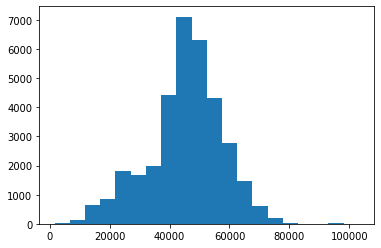

In [10]:
import matplotlib.pyplot as plt
plt.hist(Y, 20)

(array([   3.,    3.,   30.,  117.,  348.,  645., 1273., 2153., 2477.,
        2157., 1064.,  437.,  329.,  164.,   48.,   40.,   43.,   16.,
           8.,    3.]),
 array([-37034.21284129, -32673.20751741, -28312.20219353, -23951.19686965,
        -19590.19154577, -15229.18622189, -10868.180898  ,  -6507.17557412,
         -2146.17025024,   2214.83507364,   6575.84039752,  10936.8457214 ,
         15297.85104528,  19658.85636917,  24019.86169305,  28380.86701693,
         32741.87234081,  37102.87766469,  41463.88298857,  45824.88831245,
         50185.89363633]),
 <a list of 20 Patch objects>)

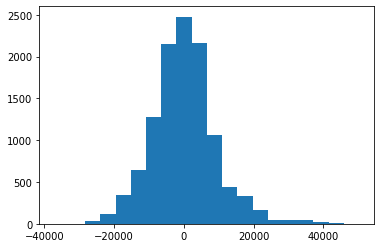

In [11]:
plt.hist(Y_pred - Y_test, 20)

(array([2.859e+03, 2.644e+03, 1.921e+03, 1.414e+03, 8.370e+02, 4.990e+02,
        4.900e+02, 2.640e+02, 1.710e+02, 8.700e+01, 3.300e+01, 3.500e+01,
        3.100e+01, 3.700e+01, 9.000e+00, 7.000e+00, 1.300e+01, 3.000e+00,
        3.000e+00, 1.000e+00]),
 array([2.18920707e+00, 2.51137443e+03, 5.02055965e+03, 7.52974487e+03,
        1.00389301e+04, 1.25481153e+04, 1.50573005e+04, 1.75664858e+04,
        2.00756710e+04, 2.25848562e+04, 2.50940414e+04, 2.76032266e+04,
        3.01124119e+04, 3.26215971e+04, 3.51307823e+04, 3.76399675e+04,
        4.01491528e+04, 4.26583380e+04, 4.51675232e+04, 4.76767084e+04,
        5.01858936e+04]),
 <a list of 20 Patch objects>)

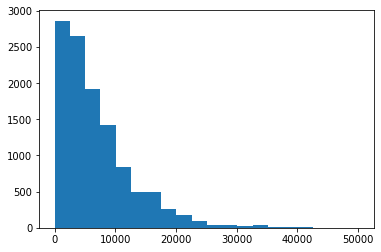

In [12]:
plt.hist(np.abs(Y_pred - Y_test), 20)

a lot of errors -> no linear relation between the price and this component

Gradient Tree Boosting

In [13]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 200, 300, 400, 500]}
reg = GradientBoostingRegressor()
search = GridSearchCV(reg, param_grid, cv=5)
search.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                

In [14]:
search.best_params_

{'n_estimators': 500}

In [15]:
reg = GradientBoostingRegressor(n_estimators=500)
reg.fit(X_train,Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [16]:
Y_pred = reg.predict(X_test)

In [17]:
np.mean(np.abs(Y_pred - Y_test))

4458.441399427079

(array([4.748e+03, 3.015e+03, 1.624e+03, 7.750e+02, 4.580e+02, 2.950e+02,
        1.840e+02, 8.400e+01, 6.400e+01, 7.000e+01, 1.600e+01, 8.000e+00,
        3.000e+00, 7.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00]),
 array([1.69209753e-01, 2.47503240e+03, 4.94989559e+03, 7.42475879e+03,
        9.89962198e+03, 1.23744852e+04, 1.48493484e+04, 1.73242116e+04,
        1.97990747e+04, 2.22739379e+04, 2.47488011e+04, 2.72236643e+04,
        2.96985275e+04, 3.21733907e+04, 3.46482539e+04, 3.71231171e+04,
        3.95979803e+04, 4.20728435e+04, 4.45477067e+04, 4.70225699e+04,
        4.94974331e+04]),
 <a list of 20 Patch objects>)

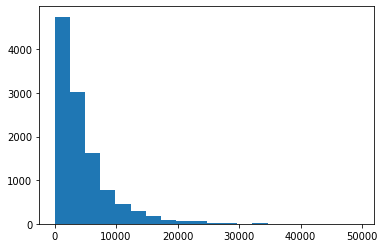

In [18]:
plt.hist(np.abs(Y_pred - Y_test), 20)

Support Vector Regression

In [34]:
from sklearn.svm import SVR
param_grid = {'kernel': ['rbf', 'linear', 'poly'], 'gamma': ['auto', 'scale']}
reg = SVR()
search = GridSearchCV(reg, param_grid, cv=5)
search.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'gamma': ['auto', 'scale'],
                         'kernel': ['rbf', 'linear', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [35]:
search.best_params_

{'gamma': 'scale', 'kernel': 'poly'}

In [47]:
reg = SVR(kernel='poly', gamma='scale')
reg.fit(X_train,Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [48]:
Y_pred = reg.predict(X_test)

In [49]:
np.mean(np.abs(Y_pred - Y_test))

7284.819306704455

(array([3.381e+03, 2.743e+03, 1.796e+03, 1.086e+03, 8.450e+02, 5.880e+02,
        3.580e+02, 2.030e+02, 2.040e+02, 2.600e+01, 2.200e+01, 3.300e+01,
        4.600e+01, 1.500e+01, 7.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00]),
 array([9.99330915e-02, 2.93106070e+03, 5.86202146e+03, 8.79298223e+03,
        1.17239430e+04, 1.46549038e+04, 1.75858645e+04, 2.05168253e+04,
        2.34477860e+04, 2.63787468e+04, 2.93097076e+04, 3.22406683e+04,
        3.51716291e+04, 3.81025899e+04, 4.10335506e+04, 4.39645114e+04,
        4.68954722e+04, 4.98264329e+04, 5.27573937e+04, 5.56883545e+04,
        5.86193152e+04]),
 <a list of 20 Patch objects>)

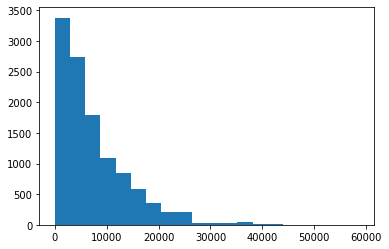

In [50]:
plt.hist(np.abs(Y_pred - Y_test), 20)